In [1]:
#basic libraries
import pandas as pd
import numpy as np


#for visulisation
import matplotlib.pyplot as plt
import seaborn as sns


#to ignore warnings
import warnings
warnings.filterwarnings('ignore')


#for feature engineering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


#for modeling
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor


#for model evaluation
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score

Importing the dataset

In [2]:
#Read the dataset
data=pd.read_csv("/content/drive/MyDrive/Datasets/Insurance/insurance_dataset.csv")

In [3]:
#view the head of the dataset
data.head()

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,NaN,Never,Blue collar,Premium,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38,male,44.88,2,yes,southwest,NaN,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25,male,19.89,0,no,northwest,NaN,Diabetes,Rarely,White collar,Standard,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838


In [4]:
#view the dimensions of the dataset
data.shape

(1000000, 12)

In [5]:
#dataset information
data.info

<bound method DataFrame.info of         age  gender    bmi  children smoker     region      medical_history  \
0        46    male  21.45         5    yes  southeast             Diabetes   
1        25  female  25.38         2    yes  northwest             Diabetes   
2        38    male  44.88         2    yes  southwest                  NaN   
3        25    male  19.89         0     no  northwest                  NaN   
4        49    male  38.21         3    yes  northwest             Diabetes   
...     ...     ...    ...       ...    ...        ...                  ...   
999995   59    male  46.67         2     no  northeast  High blood pressure   
999996   33    male  36.83         2     no  northeast                  NaN   
999997   39    male  39.84         0    yes  northeast        Heart disease   
999998   37  female  45.06         4    yes  northeast  High blood pressure   
999999   41    male  30.02         2    yes  northeast             Diabetes   

       family_medical_history exercise_frequency    occupation coverage_level  \
0                         NaN              Never   Blue collar        Premium   
1         High blood pressure       Occasionally  White collar        Premium   
2         High blood pressure       Occasionally   Blue collar        Premium   
3                    Diabetes             Rarely  White collar       Standard   
4         High blood pressure             Rarely  White collar       Standard   
...                       ...                ...           ...            ...   
999995                    NaN         Frequently       Student          Basic   
999996    High blood pressure         Frequently    Unemployed          Basic   
999997    High blood pressure             Rarely   Blue collar       Standard   
999998               Diabetes       Occasionally    Unemployed        Premium   
999999          Heart disease       Occasionally   Blue collar       Standard   

             charges  
0       20460.307669  
1       20390.899218  
2       20204.476302  
3       11789.029843  
4       19268.309838  
...              ...  
999995  11584.134900  
999996   9834.871456  
999997  22076.632856  
999998  20297.618728  
999999  23429.725030  

[1000000 rows x 12 columns]>

In [6]:
#view the null values of the dataset
data.isnull().sum()

,0
age,0
gender,0
bmi,0
children,0
smoker,0
region,0
medical_history,250762
family_medical_history,250404
exercise_frequency,0
occupation,0


In [7]:
#replace the null values with none in the dataset
data["medical_history"].fillna("None", inplace = True)
data["family_medical_history"].fillna("None", inplace = True)

In [8]:
#view the head of the dataset again after replacing null values
data.head()

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,None,Never,Blue collar,Premium,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38,male,44.88,2,yes,southwest,None,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25,male,19.89,0,no,northwest,None,Diabetes,Rarely,White collar,Standard,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838


In [9]:
#checking if there are null values anymore
data.isnull().sum()

,0
age,0
gender,0
bmi,0
children,0
smoker,0
region,0
medical_history,0
family_medical_history,0
exercise_frequency,0
occupation,0


In [10]:
#get the basic statistics
data.describe()

,age,bmi,children,charges
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,41.495282,34.001839,2.499886,16735.117481
std,13.855189,9.231680,1.707679,4415.808211
min,18.000000,18.000000,0.000000,3445.011643
25%,29.000000,26.020000,1.000000,13600.372379
50%,41.000000,34.000000,2.000000,16622.127973
75%,53.000000,41.990000,4.000000,19781.465410
max,65.000000,50.000000,5.000000,32561.560374


In [11]:
#get the basic information about the catigorical data
data.describe(include=['object'])

,gender,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level
count,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
unique,2,2,4,4,4,4,4,3
top,male,yes,northeast,None,None,Rarely,Unemployed,Basic
freq,500107,500129,250343,250762,250404,250538,250571,333515


In [12]:
print(data["gender"].unique())
print(data["smoker"].unique())
print(data["region"].unique())
print(data["medical_history"].unique())
print(data["exercise_frequency"].unique())
print(data["occupation"].unique())
print(data["coverage_level"].unique())

['male' 'female']
['yes' 'no']
['southeast' 'northwest' 'southwest' 'northeast']
['Diabetes' 'None' 'High blood pressure' 'Heart disease']
['Never' 'Occasionally' 'Rarely' 'Frequently']
['Blue collar' 'White collar' 'Student' 'Unemployed']
['Premium' 'Standard' 'Basic']


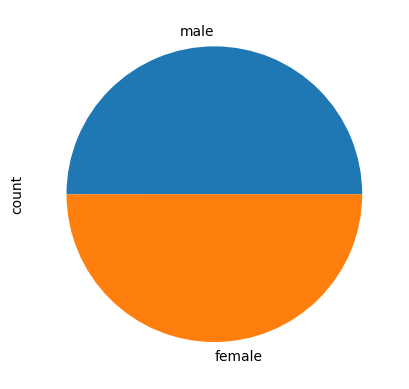

In [13]:
series = data["gender"].value_counts()
series.plot(kind='pie')
plt.show()

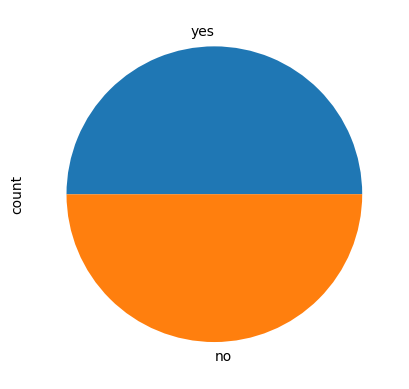

In [14]:
series = data["smoker"].value_counts()
series.plot(kind='pie')
plt.show()

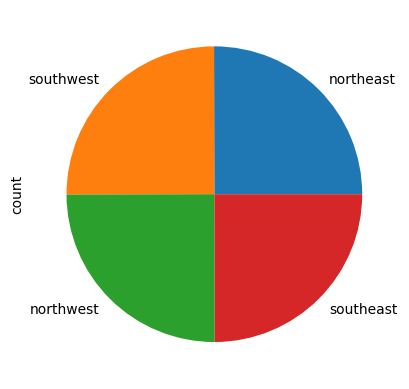

In [15]:
series = data["region"].value_counts()
series.plot(kind='pie')
plt.show()

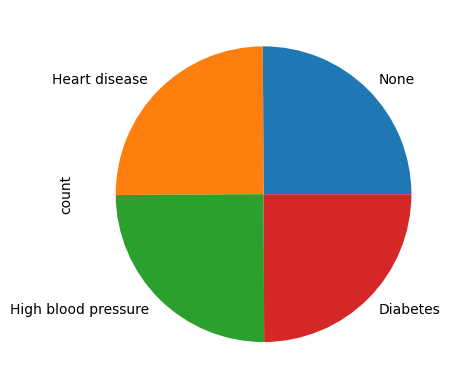

In [16]:
series = data["medical_history"].value_counts()
series.plot(kind='pie')
plt.show()

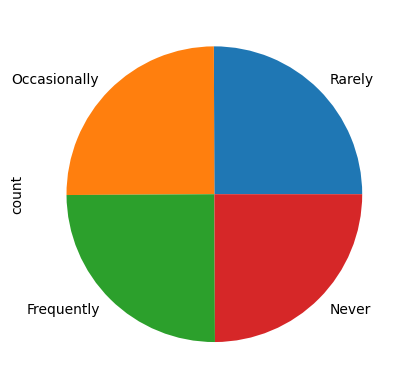

In [17]:
series = data["exercise_frequency"].value_counts()
series.plot(kind='pie')
plt.show()

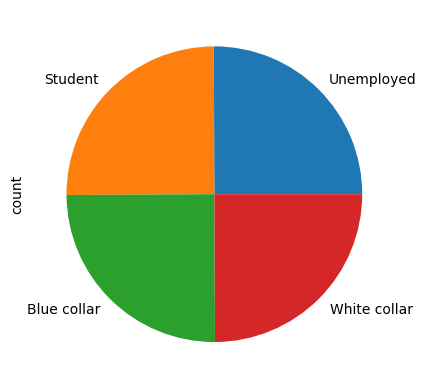

In [18]:
series = data["occupation"].value_counts()
series.plot(kind='pie')
plt.show()

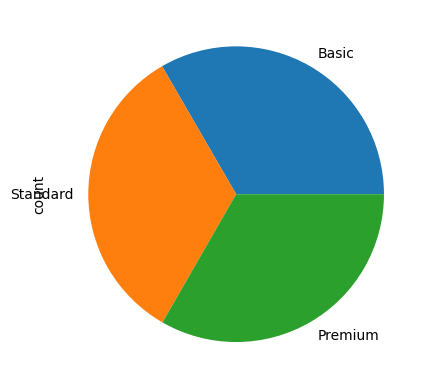

In [19]:
series = data["coverage_level"].value_counts()
series.plot(kind='pie')
plt.show()

<Axes: xlabel='gender'>

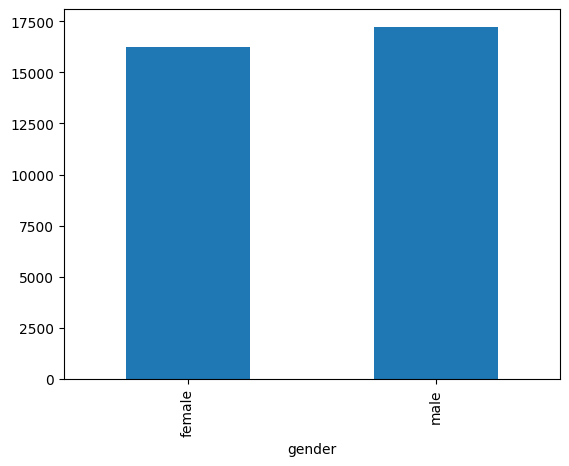

In [20]:
data.groupby(['gender'])['charges'].mean().plot.bar()

<Axes: xlabel='occupation'>

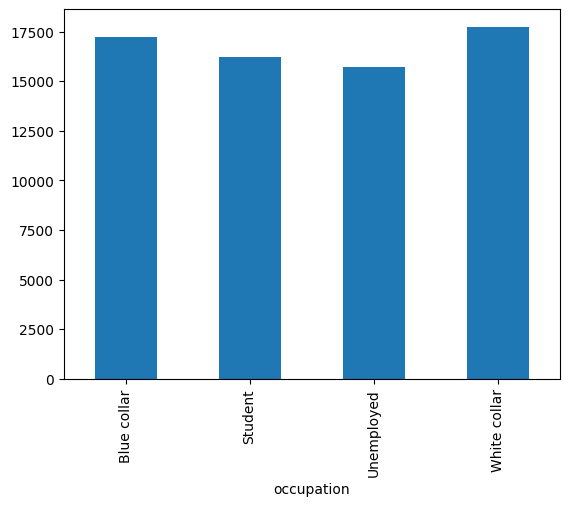

In [21]:
data.groupby(['occupation'])['charges'].mean().plot.bar()

<Axes: xlabel='medical_history'>

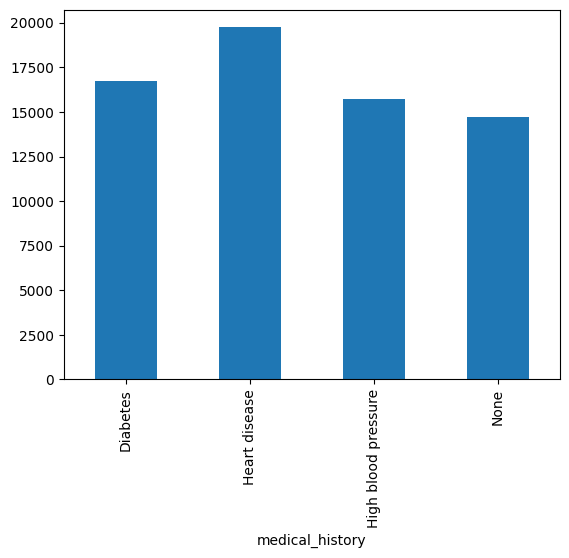

In [22]:
data.groupby(['medical_history'])['charges'].mean().plot.bar()

In [23]:
data.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region',
       'medical_history', 'family_medical_history', 'exercise_frequency',
       'occupation', 'coverage_level', 'charges'],
      dtype='object')

One Hot Encoding

In [24]:
one_hot_encoded = pd.get_dummies(data, columns=['gender','smoker','region','medical_history','family_medical_history','exercise_frequency','occupation','coverage_level'])

In [25]:
one_hot_encoded.head()

,age,bmi,children,charges,gender_female,gender_male,smoker_no,smoker_yes,region_northeast,region_northwest,...,exercise_frequency_Never,exercise_frequency_Occasionally,exercise_frequency_Rarely,occupation_Blue collar,occupation_Student,occupation_Unemployed,occupation_White collar,coverage_level_Basic,coverage_level_Premium,coverage_level_Standard
0,46,21.45,5,20460.307669,False,True,False,True,False,False,...,True,False,False,True,False,False,False,False,True,False
1,25,25.38,2,20390.899218,True,False,False,True,False,True,...,False,True,False,False,False,False,True,False,True,False
2,38,44.88,2,20204.476302,False,True,False,True,False,False,...,False,True,False,True,False,False,False,False,True,False
3,25,19.89,0,11789.029843,False,True,True,False,False,True,...,False,False,True,False,False,False,True,False,False,True
4,49,38.21,3,19268.309838,False,True,False,True,False,True,...,False,False,True,False,False,False,True,False,False,True


In [26]:
one_hot_encoded.replace(False, 0, inplace = True)
one_hot_encoded.replace(True, 1, inplace = True)

In [27]:
one_hot_encoded.head()

,age,bmi,children,charges,gender_female,gender_male,smoker_no,smoker_yes,region_northeast,region_northwest,...,exercise_frequency_Never,exercise_frequency_Occasionally,exercise_frequency_Rarely,occupation_Blue collar,occupation_Student,occupation_Unemployed,occupation_White collar,coverage_level_Basic,coverage_level_Premium,coverage_level_Standard
0,46,21.45,5,20460.307669,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,25,25.38,2,20390.899218,1,0,0,1,0,1,...,0,1,0,0,0,0,1,0,1,0
2,38,44.88,2,20204.476302,0,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
3,25,19.89,0,11789.029843,0,1,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
4,49,38.21,3,19268.309838,0,1,0,1,0,1,...,0,0,1,0,0,0,1,0,0,1


In [28]:
data1=one_hot_encoded

Correlation Matrix

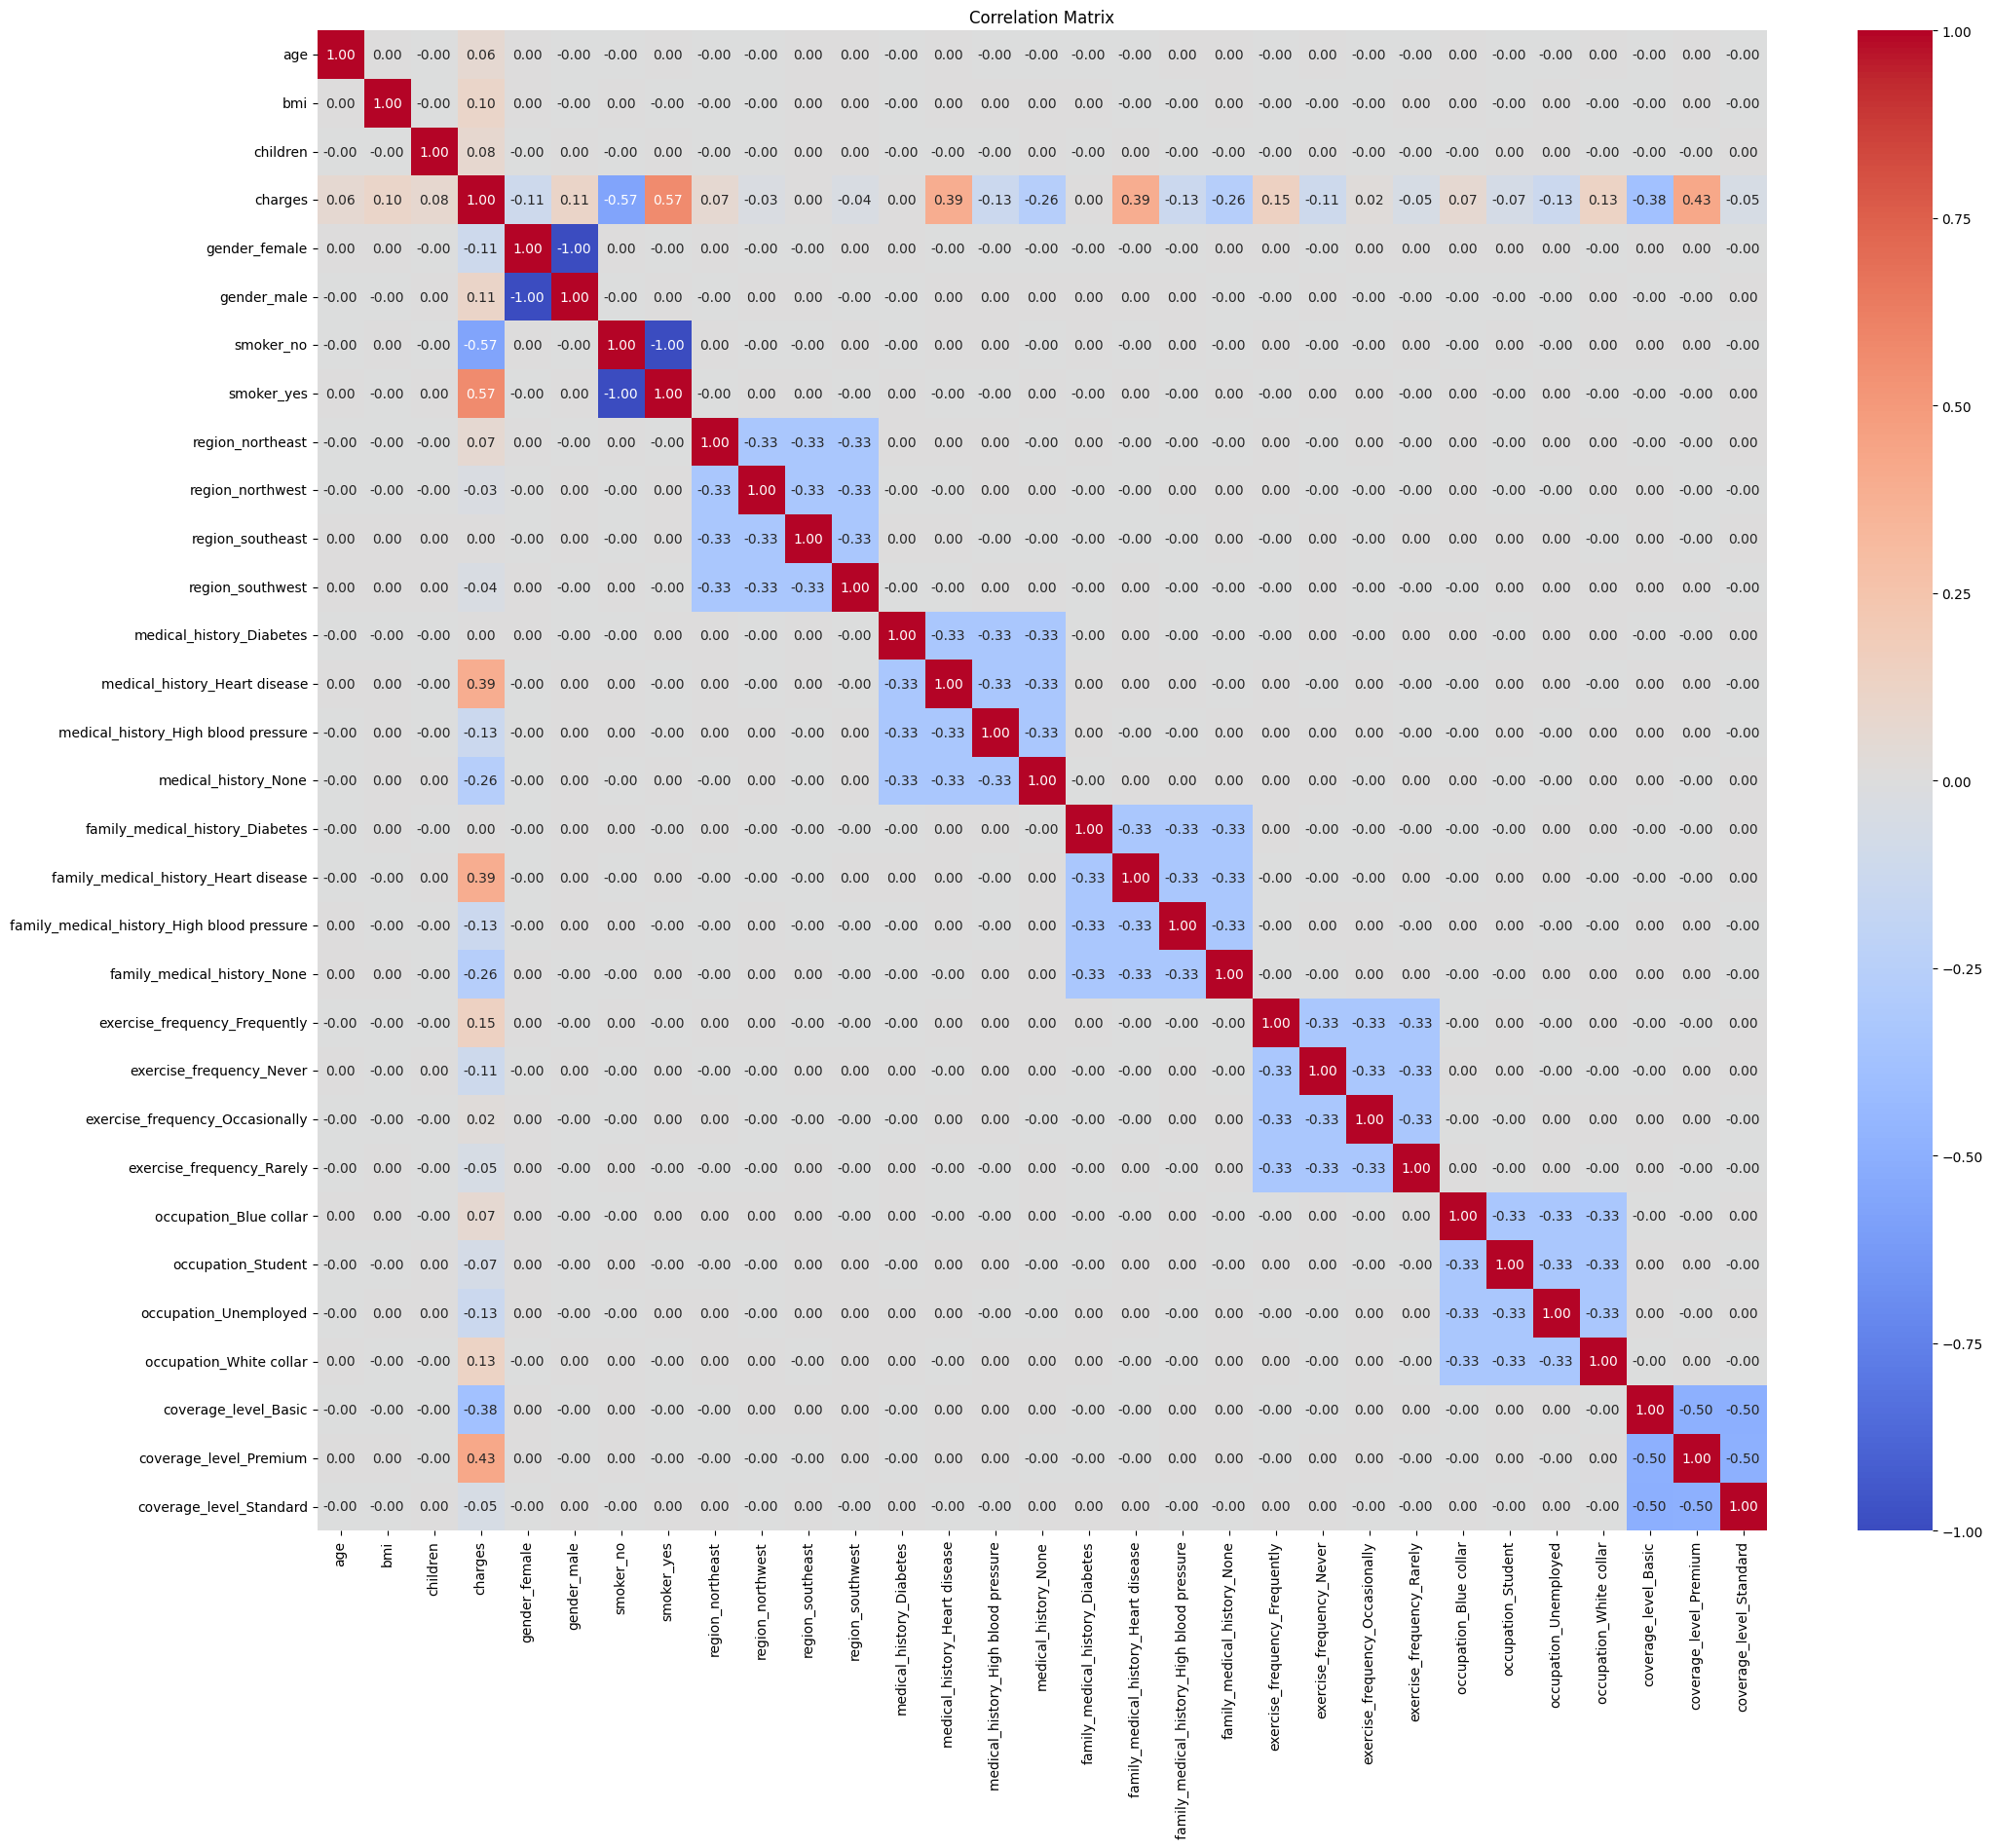

In [29]:
# Calculate the correlation matrix
corr_matrix = data1.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(24, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [30]:
corr_matrix['charges']
abs(corr_matrix['charges']).sort_values(ascending=False)

,charges
charges,1.000000
smoker_no,0.566213
smoker_yes,0.566213
coverage_level_Premium,0.426814
family_medical_history_Heart disease,0.393117
medical_history_Heart disease,0.392891
coverage_level_Basic,0.375051
family_medical_history_None,0.261978
medical_history_None,0.261887
exercise_frequency_Frequently,0.146706


In [31]:
scaler = StandardScaler()
# Specify the columns to normalize
columns_to_normalize = ['age', 'bmi']

# Fit and transform the selected columns
data1[columns_to_normalize] = scaler.fit_transform(data1[columns_to_normalize])
print(data1.head())

        age       bmi  children       charges  gender_female  gender_male  \
0  0.325129 -1.359649         5  20460.307669              0            1   
1 -1.190550 -0.933941         2  20390.899218              1            0   
2 -0.252273  1.178352         2  20204.476302              0            1   
3 -1.190550 -1.528632         0  11789.029843              0            1   
4  0.541654  0.455839         3  19268.309838              0            1   

   smoker_no  smoker_yes  region_northeast  region_northwest  ...  \
0          0           1                 0                 0  ...   
1          0           1                 0                 1  ...   
2          0           1                 0                 0  ...   
3          1           0                 0                 1  ...   
4          0           1                 0                 1  ...   

   exercise_frequency_Never  exercise_frequency_Occasionally  \
0                         1                               

In [32]:
# Spliting the data between independent and dependent variables
X = data1[data1.columns.difference(['charges'])]
y = data1['charges']

PCA

In [33]:
# Perform PCA
pca = PCA()
pca.fit(X)

PCA()

In [34]:
# Get explained variance ratio and compute cumulative variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

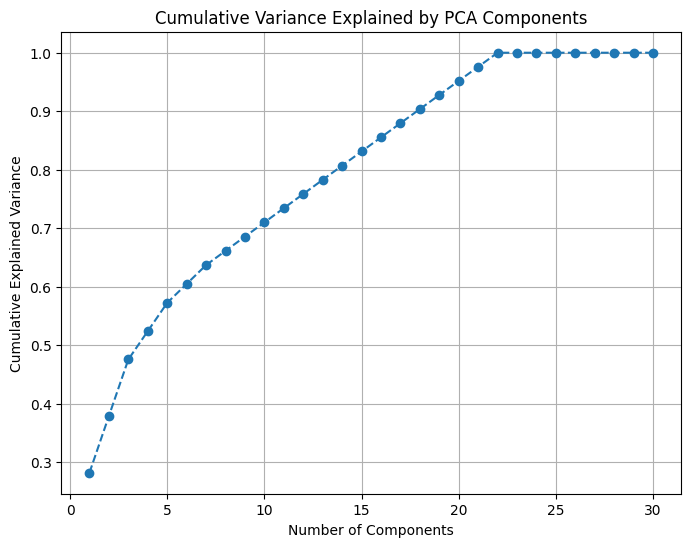

In [35]:
# Plot the cumulative variance explained
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained by PCA Components')
plt.grid(True)
plt.show()

In [36]:
# # Create a PCA object and fit it to the scaled data
# pca = PCA(n_components=5)  # Change n_components as needed
# X_pca = pca.fit_transform(X)

In [37]:
# # Explained variance ratio
# print(pca.explained_variance_ratio_)

In [38]:
# # Create a DataFrame for the PCA results
# pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# # Optionally, add the target variable for coloring the plot
# # pca_df['target'] = data['target_column']  # Uncomment if you have a target column

# # Plot the PCA results

In [39]:
# pca_df.head()

In [40]:
# # split the dataset
# X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y, test_size=0.3, random_state=0)

Train Test Split

In [41]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700000, 30), (300000, 30), (700000,), (300000,))

In [43]:
X_train.head()

,age,bmi,children,coverage_level_Basic,coverage_level_Premium,coverage_level_Standard,exercise_frequency_Frequently,exercise_frequency_Never,exercise_frequency_Occasionally,exercise_frequency_Rarely,...,occupation_Blue collar,occupation_Student,occupation_Unemployed,occupation_White collar,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
823666,-1.551425,1.639806,5,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
70066,-0.396623,-1.470138,3,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
591943,0.325129,-0.037029,2,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
578645,0.180778,0.374597,1,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
675461,1.119056,-1.322819,2,1,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [44]:
y_train.head()

,charges
823666,19117.792033
70066,11317.724241
591943,16497.343681
578645,20397.452513
675461,21926.723457


Running all the regression models

In [45]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Ridge Regression': Ridge(alpha=.1),
#    'Lasso Regression': Lasso(alpha=.1),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=50, max_depth=20, n_jobs=-1, min_samples_split=10, min_samples_leaf=5),
    'XG Boost': XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
#    'K-Neighbors Regressor': KNeighborsRegressor(n_jobs=-1)
#    'Support Vector Regressor': SVR(kernel='rbf', C=1.0)
# Add more models as needed
}

In [46]:
# For regression models
results1 = {}
results2 = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    results1[name] = mse
    r2 = r2_score(y_test, predictions)
    results2[name] = r2

In [47]:
# Print results
print("R² Scores:")
for model_name, r2 in results2.items():
    print(f"{model_name}: R² = {r2:.4f}")
print("Mean Squared Errors:")
for model_name, mse in results1.items():
    print(f"{model_name}: MSE = {mse:.2f}")

R² Scores:
Linear Regression: R² = 0.9957
Decision Tree Regressor: R² = 0.9865
Ridge Regression: R² = 0.9957
Random Forest Regressor: R² = 0.9929
XG Boost: R² = 0.9949
Mean Squared Errors:
Linear Regression: MSE = 83423.76
Decision Tree Regressor: MSE = 264049.74
Ridge Regression: MSE = 83423.76
Random Forest Regressor: MSE = 139686.62
XG Boost: MSE = 99553.96
